In [26]:
from IPython.core.interactiveshell import InteractiveShell
#InteractiveShell.ast_node_interactivity = "all"
InteractiveShell.ast_node_interactivity = "last"

In [1]:
import sys
print(sys.executable)


/home/erik/anaconda3/envs/auto/bin/python


In [79]:
#from sympy import sequence
#from sympy.abc import n
#from sympy import oo, exp, dsolve
#from sympy import Function, Derivative
#from sympy.abc import  t
#from sympy import factor, expand
from IPython.display import display, Latex
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
from sympy import solve
from sympy.core.symbol import symbols, Symbol
#from sympy.solvers.solveset import nonlinsolve
from sympy import solveset
#from lcapy import s, j, omega
import control as ct 
from control.matlab import *



In [30]:
sigma = symbols('sigma', real=True, positive=True)
K = symbols('K', real=True, positive=True)
w = symbols('omega', real=True, positive=True)
s = symbols('s')
d = (s + sigma)**2 + w**2
d

omega**2 + (s + sigma)**2

In [31]:
solveset(d,s)

{-I*omega - sigma, I*omega - sigma}

In [32]:
n= K*w**2
H = n/d
H

K*omega**2/(omega**2 + (s + sigma)**2)

In [33]:
H.subs({s:0})

K*omega**2/(omega**2 + sigma**2)

In [ ]:
H = H.subs({K:2, sigma:1, w : 1})
H

In [16]:
K = 2
sigma=1
w = 1
A = np.array([[-2*sigma, -(sigma**2+w**2)],[1,0]])
B = np.array([[K*w**2],[0]])
C = np.array([[0, 1]])
D = 0
A
B
C
D
Hss = ss(A,B,C,D)
Hss


array([[-2, -2],
       [ 1,  0]])

array([[2],
       [0]])

array([[0, 1]])

0

StateSpace(array([[-2., -2.],
       [ 1.,  0.]]), array([[2.],
       [0.]]), array([[0., 1.]]), array([[0.]]))

Text(0.5, 1.0, 'Step Response in Python')

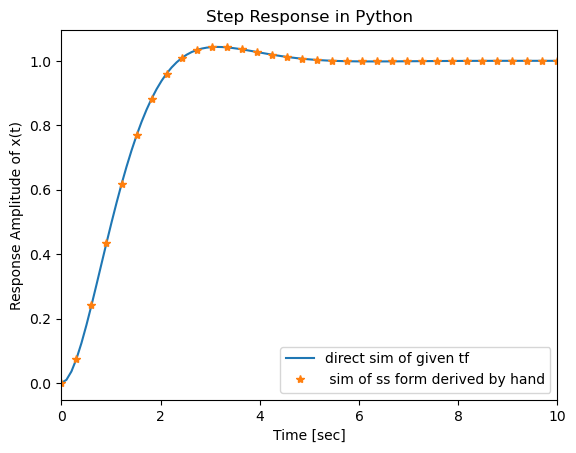

In [28]:
H = tf([K*w**2],[1, 2*sigma, sigma**2+w**2])
yout, t_eval2 = step(H ,10)
yout_ss, t_eval_ss = step(Hss,10 )
fig, ax = plt.subplots()
ax.plot(t_eval2, yout, label='direct sim of given tf')
ax.plot(t_eval_ss, yout_ss,label=' sim of ss form derived by hand',
        linestyle='none', marker ='*', markevery=3)
ax.set_ylabel('Response Amplitude of x(t)')
ax.set_xlabel('Time [sec]')
ax.set_xlim(0, 10)
ax.legend()
ax.set_title(f'Step Response in Python')

In [7]:
tf2ss(H)

StateSpace(array([[-2., -2.],
       [ 1.,  0.]]), array([[-1.],
       [ 0.]]), array([[ 0., -2.]]), array([[0.]]))

Text(0.5, 1.0, 'Step Response Varying K')

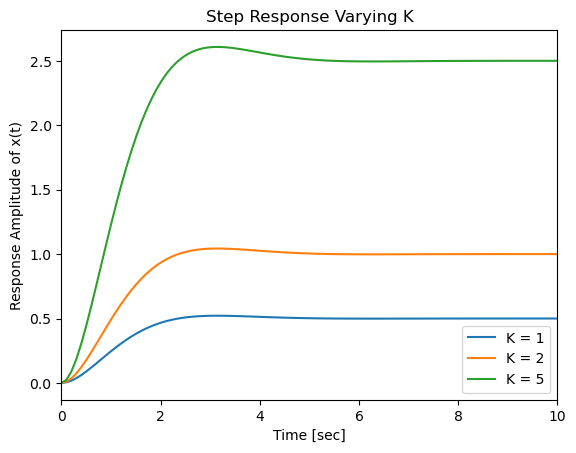

In [29]:
fig, ax = plt.subplots()
sigma=1
w = 1
for K in [1, 2, 5]:
    H = tf([K*w**2],[1, 2*sigma, sigma**2+w**2])
    yout, t_eval2 = step(H ,10)
    ax.plot(t_eval2, yout, label=f'K = {K}')

ax.set_ylabel('Response Amplitude of x(t)')
ax.set_xlabel('Time [sec]')
ax.set_xlim(0, 10)
ax.legend()
ax.set_title(f'Step Response Varying K')

Text(0.5, 1.0, 'Step Response Varying $\\sigma$')

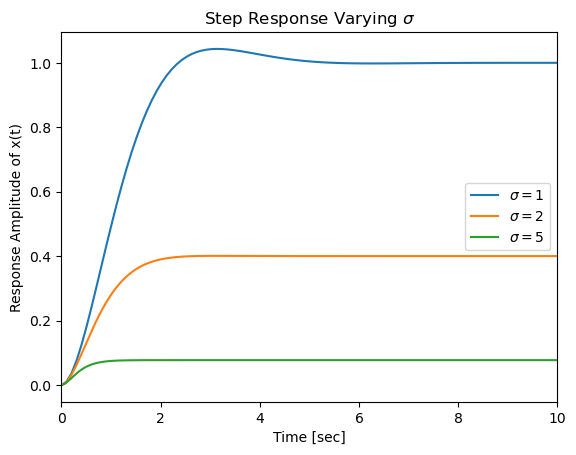

In [37]:
fig, ax = plt.subplots()
K = 2
w = 1
for sigma in [1, 2, 5]:
    H = tf([K*w**2],[1, 2*sigma, sigma**2+w**2])
    yout, t_eval2 = step(H ,10)
    ax.plot(t_eval2, yout, label=r'$\sigma =$' +f'{sigma}')

ax.set_ylabel('Response Amplitude of x(t)')
ax.set_xlabel('Time [sec]')
ax.set_xlim(0, 10)
ax.legend(loc='right')
ax.set_title(f'Step Response Varying $\sigma$')

Text(0.5, 1.0, 'Step Response Varying $\\omega$')

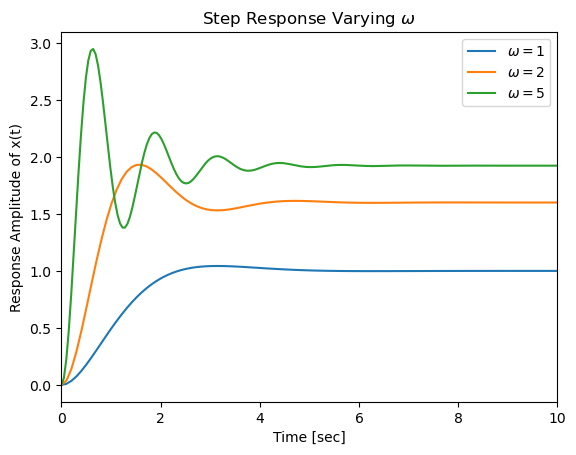

In [40]:
fig, ax = plt.subplots()
K = 2
sigma = 1

for w in [1, 2, 5]:
    H = tf([K*w**2],[1, 2*sigma, sigma**2+w**2])
    yout, t_eval2 = step(H ,10)
    ax.plot(t_eval2, yout, label=r'$\omega =$' +f'{w}')

ax.set_ylabel('Response Amplitude of x(t)')
ax.set_xlabel('Time [sec]')
ax.set_xlim(0, 10)
ax.legend()
ax.set_title(f'Step Response Varying $\omega$')

In [ ]:
from lcapy import s, j, transfer 
K = 2
sigma=1
w = 1
H = K*w**2 / (w**2 + (s+sigma)**2)
H


In [ ]:
H.poles()
#H.state_equations()

In [ ]:
H = transfer(K*w**2 / (w**2 + (s+sigma)**2))
H
#H.state_equations()

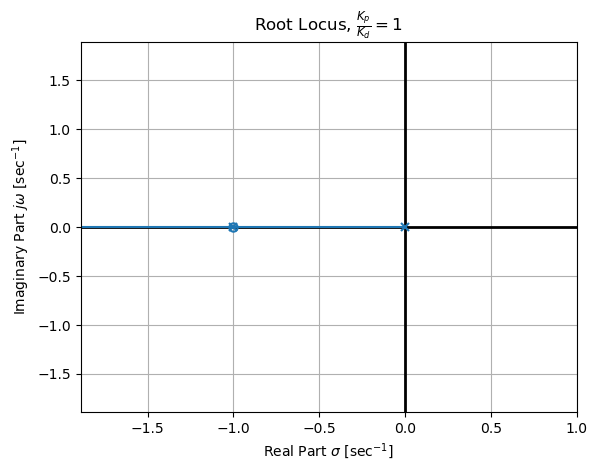

In [91]:
fig, ax = plt.subplots()
k_rat = 1
C = ct.tf([1,k_rat ], [1]) 
P = ct.tf([1], [1, 1, 0])
FG = ct.series(C,P )
#print(FG)
#T = ct.feedback(FG)
ax.set_title(r'Root Locus, $\frac{K_p}{K_d}=$'+f'{k_rat}')
ax.grid()
ax.axhline(0,color='k',  linewidth=2)  # Horizontal line (x-axis) at y=0
ax.axvline(0, color='k', linewidth=2)  # Vertical line (y-axis) at x=0
ax.set_xlabel(r'Real Part $\sigma\,\, [\text{sec}^{-1}]$' )
ax.set_ylabel(r'Imaginary Part $j\omega \,\, [\text{sec}^{-1}]$')
ct.root_locus(FG, ax=ax)

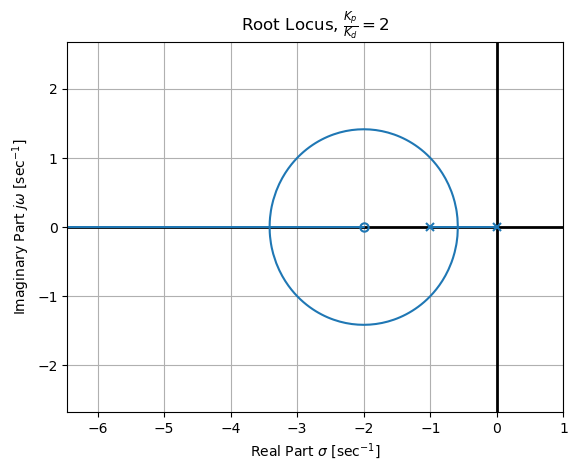

In [95]:
fig, ax = plt.subplots()
k_rat = 2
C = ct.tf([1,k_rat ], [1]) 
P = ct.tf([1], [1, 1, 0])
FG = ct.series(C,P )
#print(FG)
#T = ct.feedback(FG)
ax.set_title(r'Root Locus, $\frac{K_p}{K_d}=$'+f'{k_rat}')
ax.grid()
ax.axhline(0,color='k',  linewidth=2)  # Horizontal line (x-axis) at y=0
ax.axvline(0, color='k', linewidth=2)  # Vertical line (y-axis) at x=0
ax.set_xlabel(r'Real Part $\sigma\,\, [\text{sec}^{-1}]$' )
ax.set_ylabel(r'Imaginary Part $j\omega \,\, [\text{sec}^{-1}]$')

ct.root_locus(FG, ax=ax)
#ax.set_xlim(-10,0)

In [96]:
#2d
Kp = 4
Kd = 3
C = ct.tf([Kd,Kp], [1]) 
P = ct.tf([1], [1, 1, 0])
FG = ct.series(C,P )
FG
YoverR = ct.feedback(FG)
print('Y(s)/R(s)=')
display(YoverR)
print('Y(0)/R(0)= ' + f'{YoverR(0)}')


Y(s)/R(s)=


TransferFunction(array([3, 4]), array([1, 4, 4]))

Y(0)/R(0)= (1+0j)


In [122]:
YoverD = ct.feedback(P, C)
print('Y(s)/D(s)=')
display(YoverD)
print('Y(0)/D(0)= ' + f'{YoverD(0)}')

Y(s)/D(s)=


TransferFunction(array([1]), array([1, 4, 4]))

Y(0)/D(0)= (0.25+0j)


Text(0.5, 1.0, 'Step Response $\\frac{Y(s)}{R(s)}$')

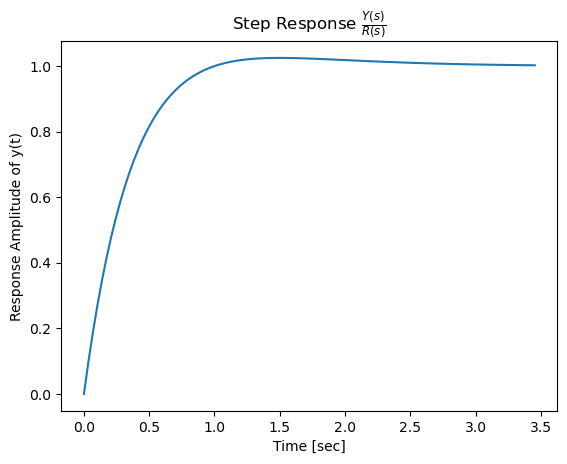

In [103]:
#2e
fig, ax = plt.subplots()
yout, t_eval = step(YoverR)
ax.plot(t_eval, yout)#, label=r'$\omega =$' +f'{w}')
ax.set_ylabel('Response Amplitude of y(t)')
ax.set_xlabel('Time [sec]')
ax.set_title(r'Step Response $\frac{Y(s)}{R(s)}$')

F(s)=


TransferFunction(array([1]), array([3, 4]))

precompensated F(s)Y(s)/R(s)=


TransferFunction(array([3, 4]), array([ 3, 16, 28, 16]))

Text(0.5, 1.0, 'Step Response $\\frac{F(s)Y(s)}{R(s)}$')

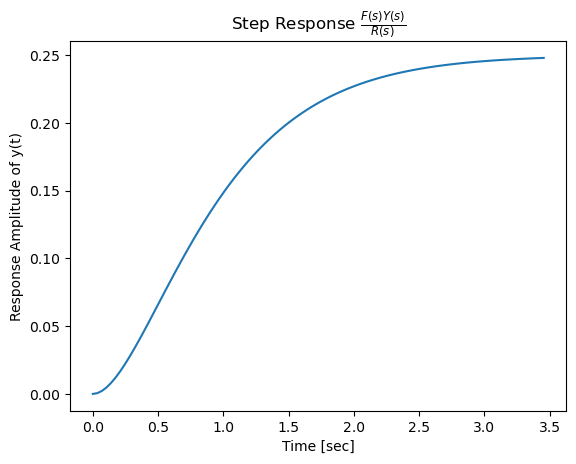

In [121]:
#2f 
F = tf(1, YoverR.num[0][0])
print('F(s)=')
display(F)
print('precompensated F(s)Y(s)/R(s)=')
display(series(F, YoverR))
fig, ax = plt.subplots()
yout, t_eval = step(series(YoverR,F))
ax.plot(t_eval, yout)#, label=r'$\omega =$' +f'{w}')
ax.set_ylabel('Response Amplitude of y(t)')
ax.set_xlabel('Time [sec]')
ax.set_title(r'Step Response $\frac{F(s)Y(s)}{R(s)}$')

In [119]:
YR2 = series(F, YoverR)
YR2
tf2zpk(YR2.num[0][0], YR2.den[0][0])

(array([-1.33333333]),
 array([-2.        +9.63239065e-08j, -2.        -9.63239065e-08j,
        -1.33333333+0.00000000e+00j]),
 1.0)

In [118]:
YoverR.num[0][0]

array([3, 4])